In [1]:
%pylab inline
from numpy import loadtxt
import sys, os


Populating the interactive namespace from numpy and matplotlib


In [2]:
nb_directory = os.getcwd()
print(nb_directory)
sys.path.insert(0, os.path.join(nb_directory, '..'))



/Users/mariannejbr/Dropbox/f_R-Chi2/code-chi2-bao-sneia-shared/notebooks


In [35]:
from Constants_Units import REDUCED_H0, OMEGAM0, H0p
from Cosmology_DE import rBAO, hubbleflat, mu_SNe, wz
from Input.bao_data import REDSHIFTS_RBAO_7new, OBSERV_RBAO_7new, ERRORS_RBAO_7new
from Input.SNeIa_bdata import REDSHIFTS_SNe, OBS_SNe, ERROR_SNe
from Input.hz_data import REDSHIFTS_Hz, OBS_Hz, ERROR_Hz

In [4]:
class FancyFormatter(Formatter):
    """Formater for values with LaTeX fonts."""

    def __call__(self, v, pos=None):
        return r'${:.5G}$'.format(v)

    def format_data_short(self, value):
        return '{:.1f}'.format(value)

# 4 dimensional parametrization

In [5]:
fileBAO = './../Output/BFV/BAO/BAO-f_R_4params-20171104-165447.txt'
fileTotal= './../Output/BFV/Total/TOTAL-6params-20171104-163023.txt'
fileSNe = './../Output/BFV/SNe/SNe-fR-4params-20171104-165049.txt'
fileHz = './../Output/BFV/Hz/Hz-f_R-4params-20171104-164907.txt'

In [26]:
bfvB = np.loadtxt(fileBAO)
bfvS = np.loadtxt(fileSNe)
bfvH = np.loadtxt(fileHz)
bfvT = np.loadtxt(fileTotal)

[wtodayb, chi2minb, chi2redb, w0b, w1b, w2b, w3b, h, om] = bfvB
[wtodays, chi2mins, chi2reds, w0s, w1s, w2s, w3s, h, om] = bfvS
[wtodayh, chi2minh, chi2redh, w0h, w1h, w2h, w3h, h, om] = bfvH
[wtodayt, chi2mint, chi2redt, w0t, w1t, w2t, w3t, h, om] = bfvT

wparams_bao = w0b, w1b, w2b, w3b
wparams_sne = w0s, w1s, w2s, w3s
wparams_hz = w0h, w1h, w2h, w3h
wparams_tot = w0t, w1t, w2t, w3t
cosmo_params =  h, om


wparams_lcdm = 0, 0, 0, 0
cosmo_paramslcdm = REDUCED_H0, OMEGAM0

zarray = np.linspace(0.01,3,300)



(0.6727, 0.31390510793330473)

In [17]:
rBAOz = vectorize(rBAO)
rBAOz.excluded.add(1)
rBAOz.excluded.add(2)

mu_SNez = vectorize(mu_SNe, excluded=[1, 2])
hz = vectorize(hubbleflat,excluded=[1, 2])
#vectorize

rBAOz(zarray[:10], wparams_bao, cosmo_params)
mu_SNez(zarray[:10], wparams_sne, cosmo_params)
100*hz(zarray[:10], wparams_hz, cosmo_params)/H0p

array([ 71.57372321,  71.62814745,  71.68357887,  71.74001206,
        71.79744163,  71.85586222,  71.91526851,  71.97565523,
        72.03701712,  72.09934895])

### BAO distance

In [51]:
rB = rBAOz(zarray, wparams_bao, cosmo_params)
rS = rBAOz(zarray, wparams_sne, cosmo_params)
rH = rBAOz(zarray, wparams_hz, cosmo_params)
rT = rBAOz(zarray, wparams_tot, cosmo_params)
rL = rBAOz(zarray, wparams_lcdm, cosmo_paramslcdm)


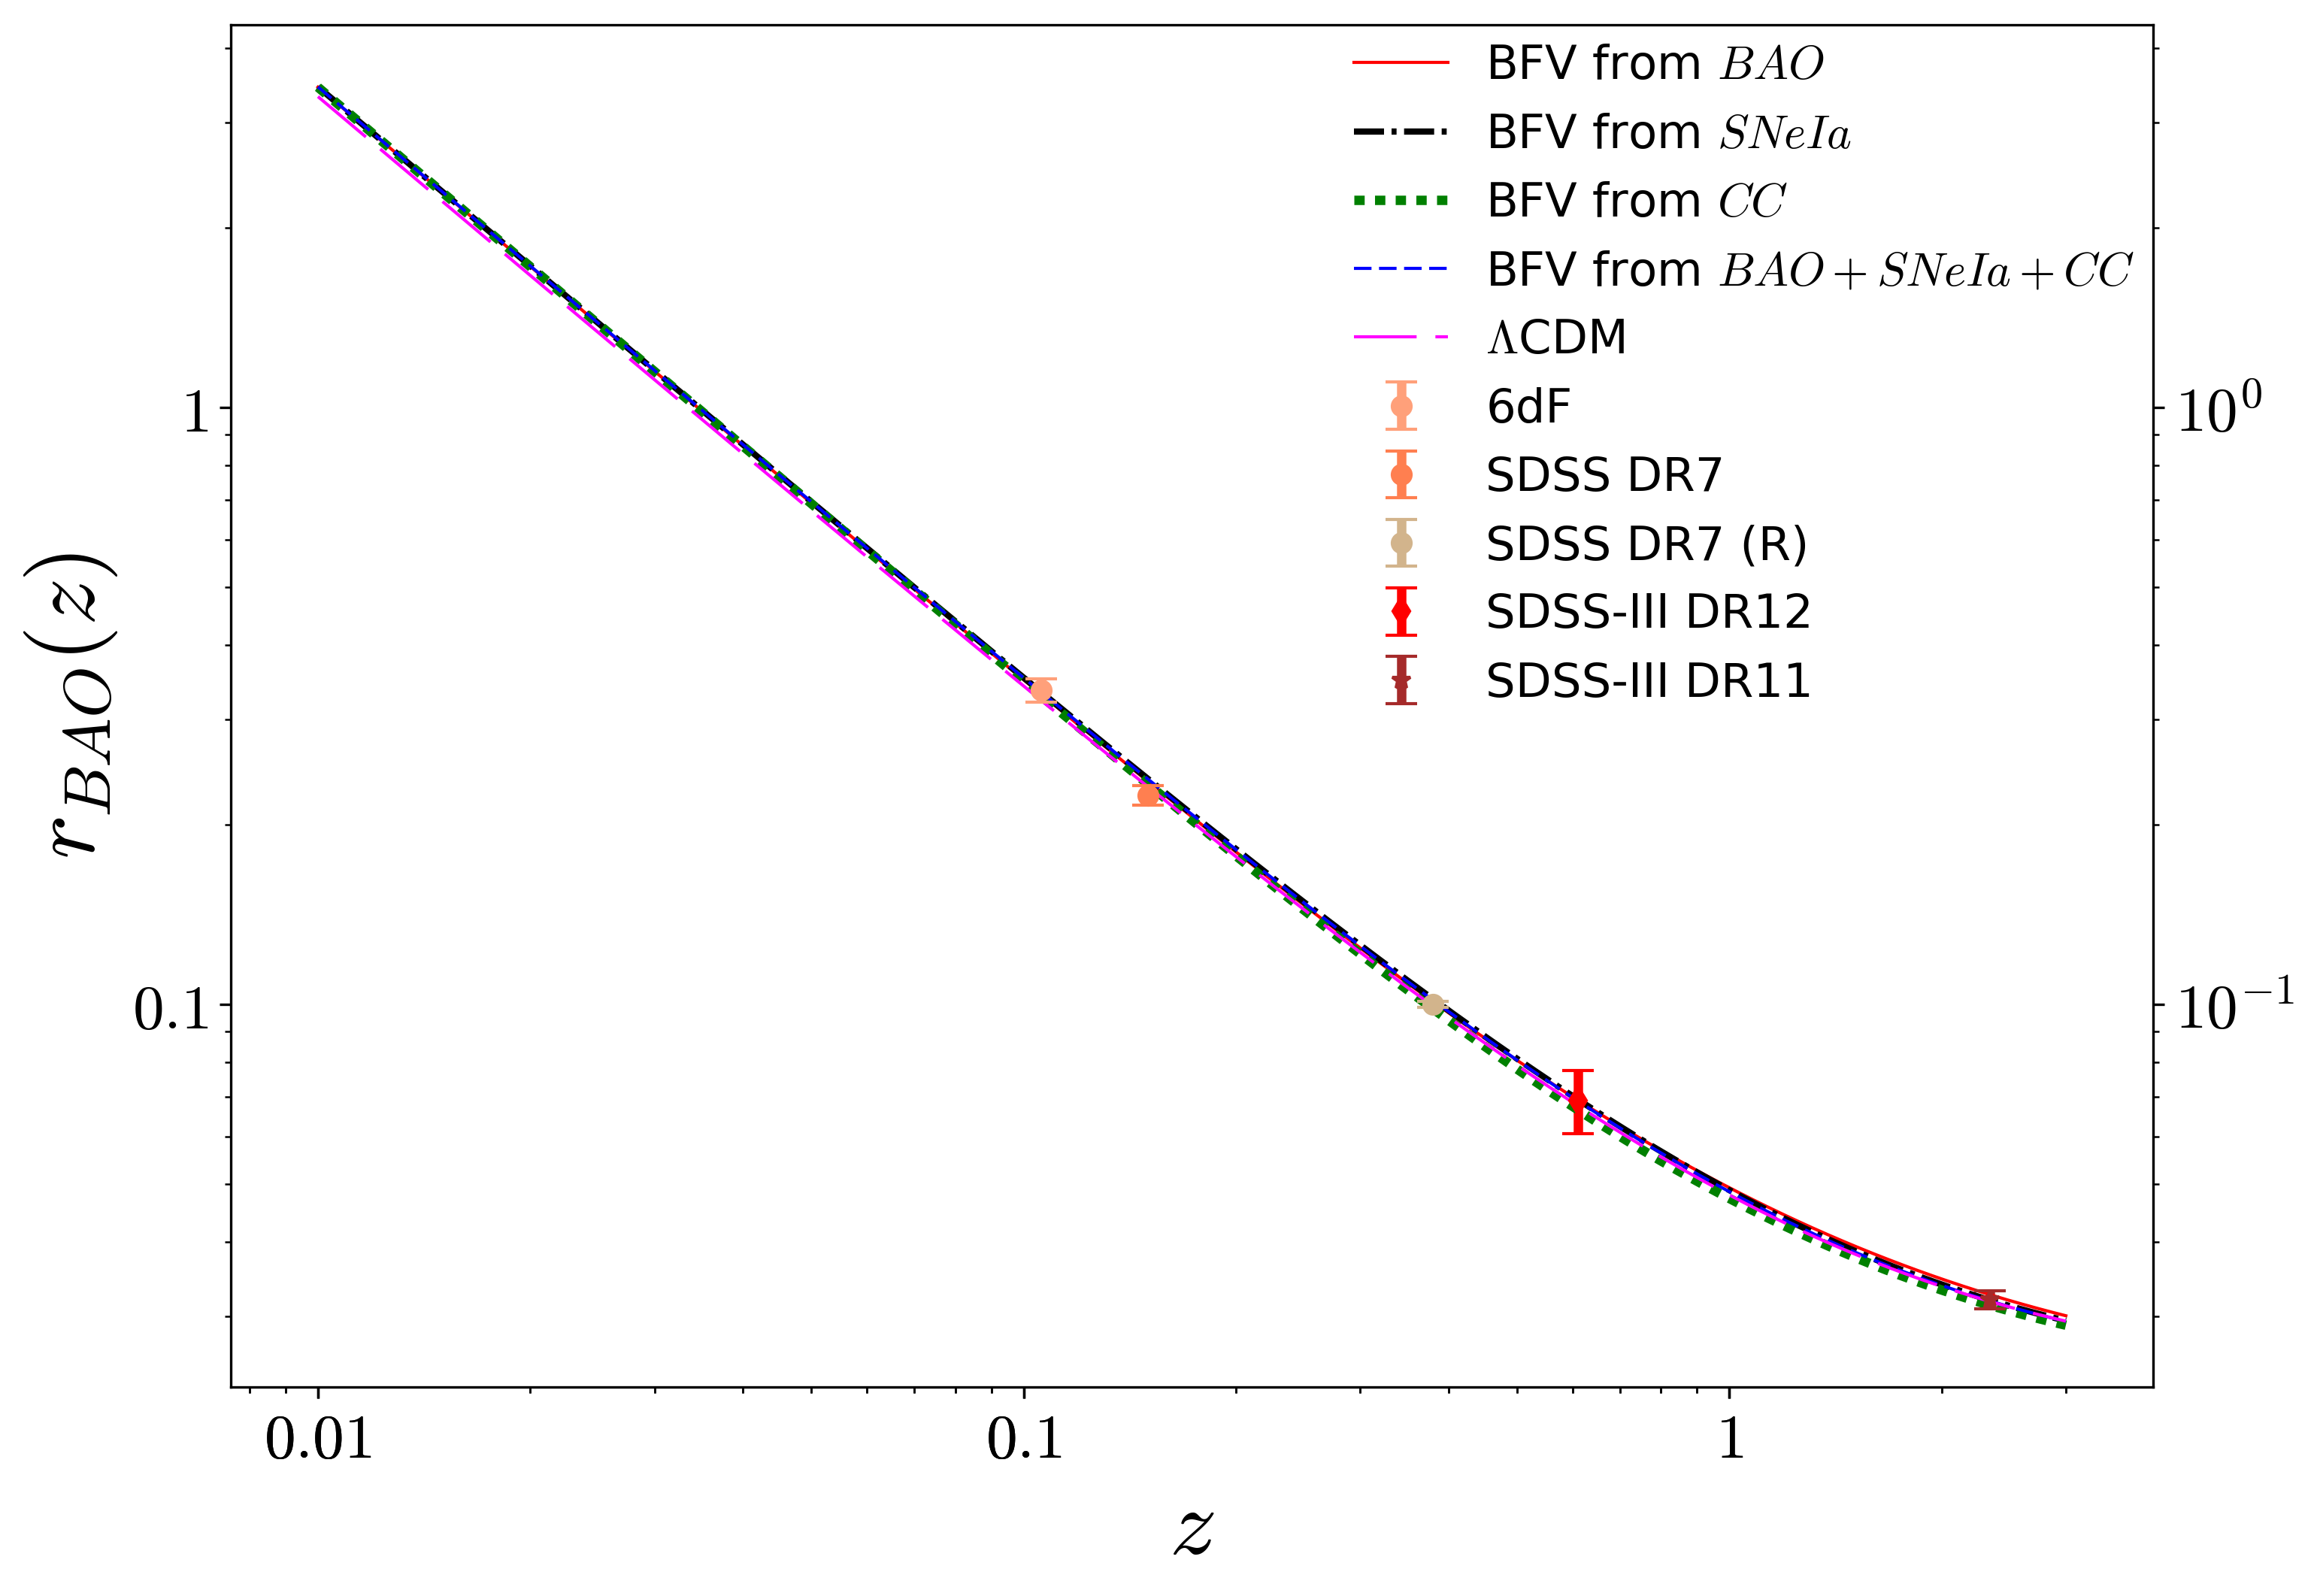

In [97]:
# Size in inches, and dots per inch
#normalize_params()
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset']='cm'

fig1 = figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(1, 1)
subplots_adjust(hspace=0.01)

subplot(grid_spec[0])
cax = gca()



plot(zarray, rB, ls = '-', color = 'red', lw = 1, label = "BFV from $BAO$")
plot(zarray, rS, ls='-.', color="black", lw=2, label="BFV from $SNeIa$")
plot(zarray, rH, ls=':', color="green", lw=3, label="BFV from $CC$")
plot(zarray, rT, ls='--', color="blue", lw=1, label="BFV from $BAO + SNeIa + CC$")
plot(zarray, rL, ls='--', color='magenta', dashes=[10,3], lw=1, label=r'$\Lambda$CDM')

plt.yscale('log')
plt.xscale('log')

plt.errorbar(REDSHIFTS_RBAO_7new[0], OBSERV_RBAO_7new[0], ERRORS_RBAO_7new[0], 
             color='lightsalmon',xerr=None,marker='o',ls='None', elinewidth =3, 
             capthick = 1, capsize=5, label ='6dF')
plt.errorbar(REDSHIFTS_RBAO_7new[1], OBSERV_RBAO_7new[1], ERRORS_RBAO_7new[1], 
             color='coral',xerr=None,marker='o',ls='None', elinewidth =3, 
             capthick = 1, capsize=5, label ='SDSS DR7')
plt.errorbar(REDSHIFTS_RBAO_7new[2], OBSERV_RBAO_7new[2], ERRORS_RBAO_7new[2], 
             color='tan',xerr=None,marker='o',ls='None', elinewidth =3, 
             capthick = 1, capsize=5, label ='SDSS DR7 (R)')

plt.errorbar(REDSHIFTS_RBAO_7new[3:4], OBSERV_RBAO_7new[3:4], ERRORS_RBAO_7new[1], 
             color='r',xerr=None,marker='d',ls='None', elinewidth =3, 
             capthick = 1, capsize=5, label ='SDSS-III DR12')

plt.errorbar(REDSHIFTS_RBAO_7new[5:6], OBSERV_RBAO_7new[5:6], ERRORS_RBAO_7new[2], 
             color='brown',xerr=None,marker='*',ls='None', elinewidth =3, 
             capthick = 1, capsize=5, label ='SDSS-III DR11')

ymin, ymax = ylim()

xlabel(r'$z$', fontsize=30)
ylabel(r'$r_{BAO}(z)$', fontsize=30)


cax.yaxis.set_ticks_position('left')

cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())
plt.legend(loc='best', borderaxespad=0., prop={'size':15}, frameon=False)

#################### Empty subplot  #####################

cax2 = fig1.add_subplot(grid_spec[0], sharex=cax, frameon=False)
cax2.yaxis.set_major_formatter(FancyFormatter())
cax2.xaxis.set_major_formatter(FancyFormatter())
cax2.yaxis.set_ticks_position("right")
#cax2.xaxis.set_ticks_position("top")
cax2.set_yscale('log')
cax2.set_ylim(ymin, ymax)

savefig('./../figures/rbao_bfvs_log_log.pdf', bbox_inches='tight')



### SNe distance (modulus of luminosity distance) 

In [52]:
muB = mu_SNez(zarray, wparams_bao, cosmo_params)
muS = mu_SNez(zarray, wparams_sne, cosmo_params)
muH = mu_SNez(zarray, wparams_hz, cosmo_params)
muT = mu_SNez(zarray, wparams_tot, cosmo_params)
muL = mu_SNez(zarray, wparams_lcdm, cosmo_paramslcdm)


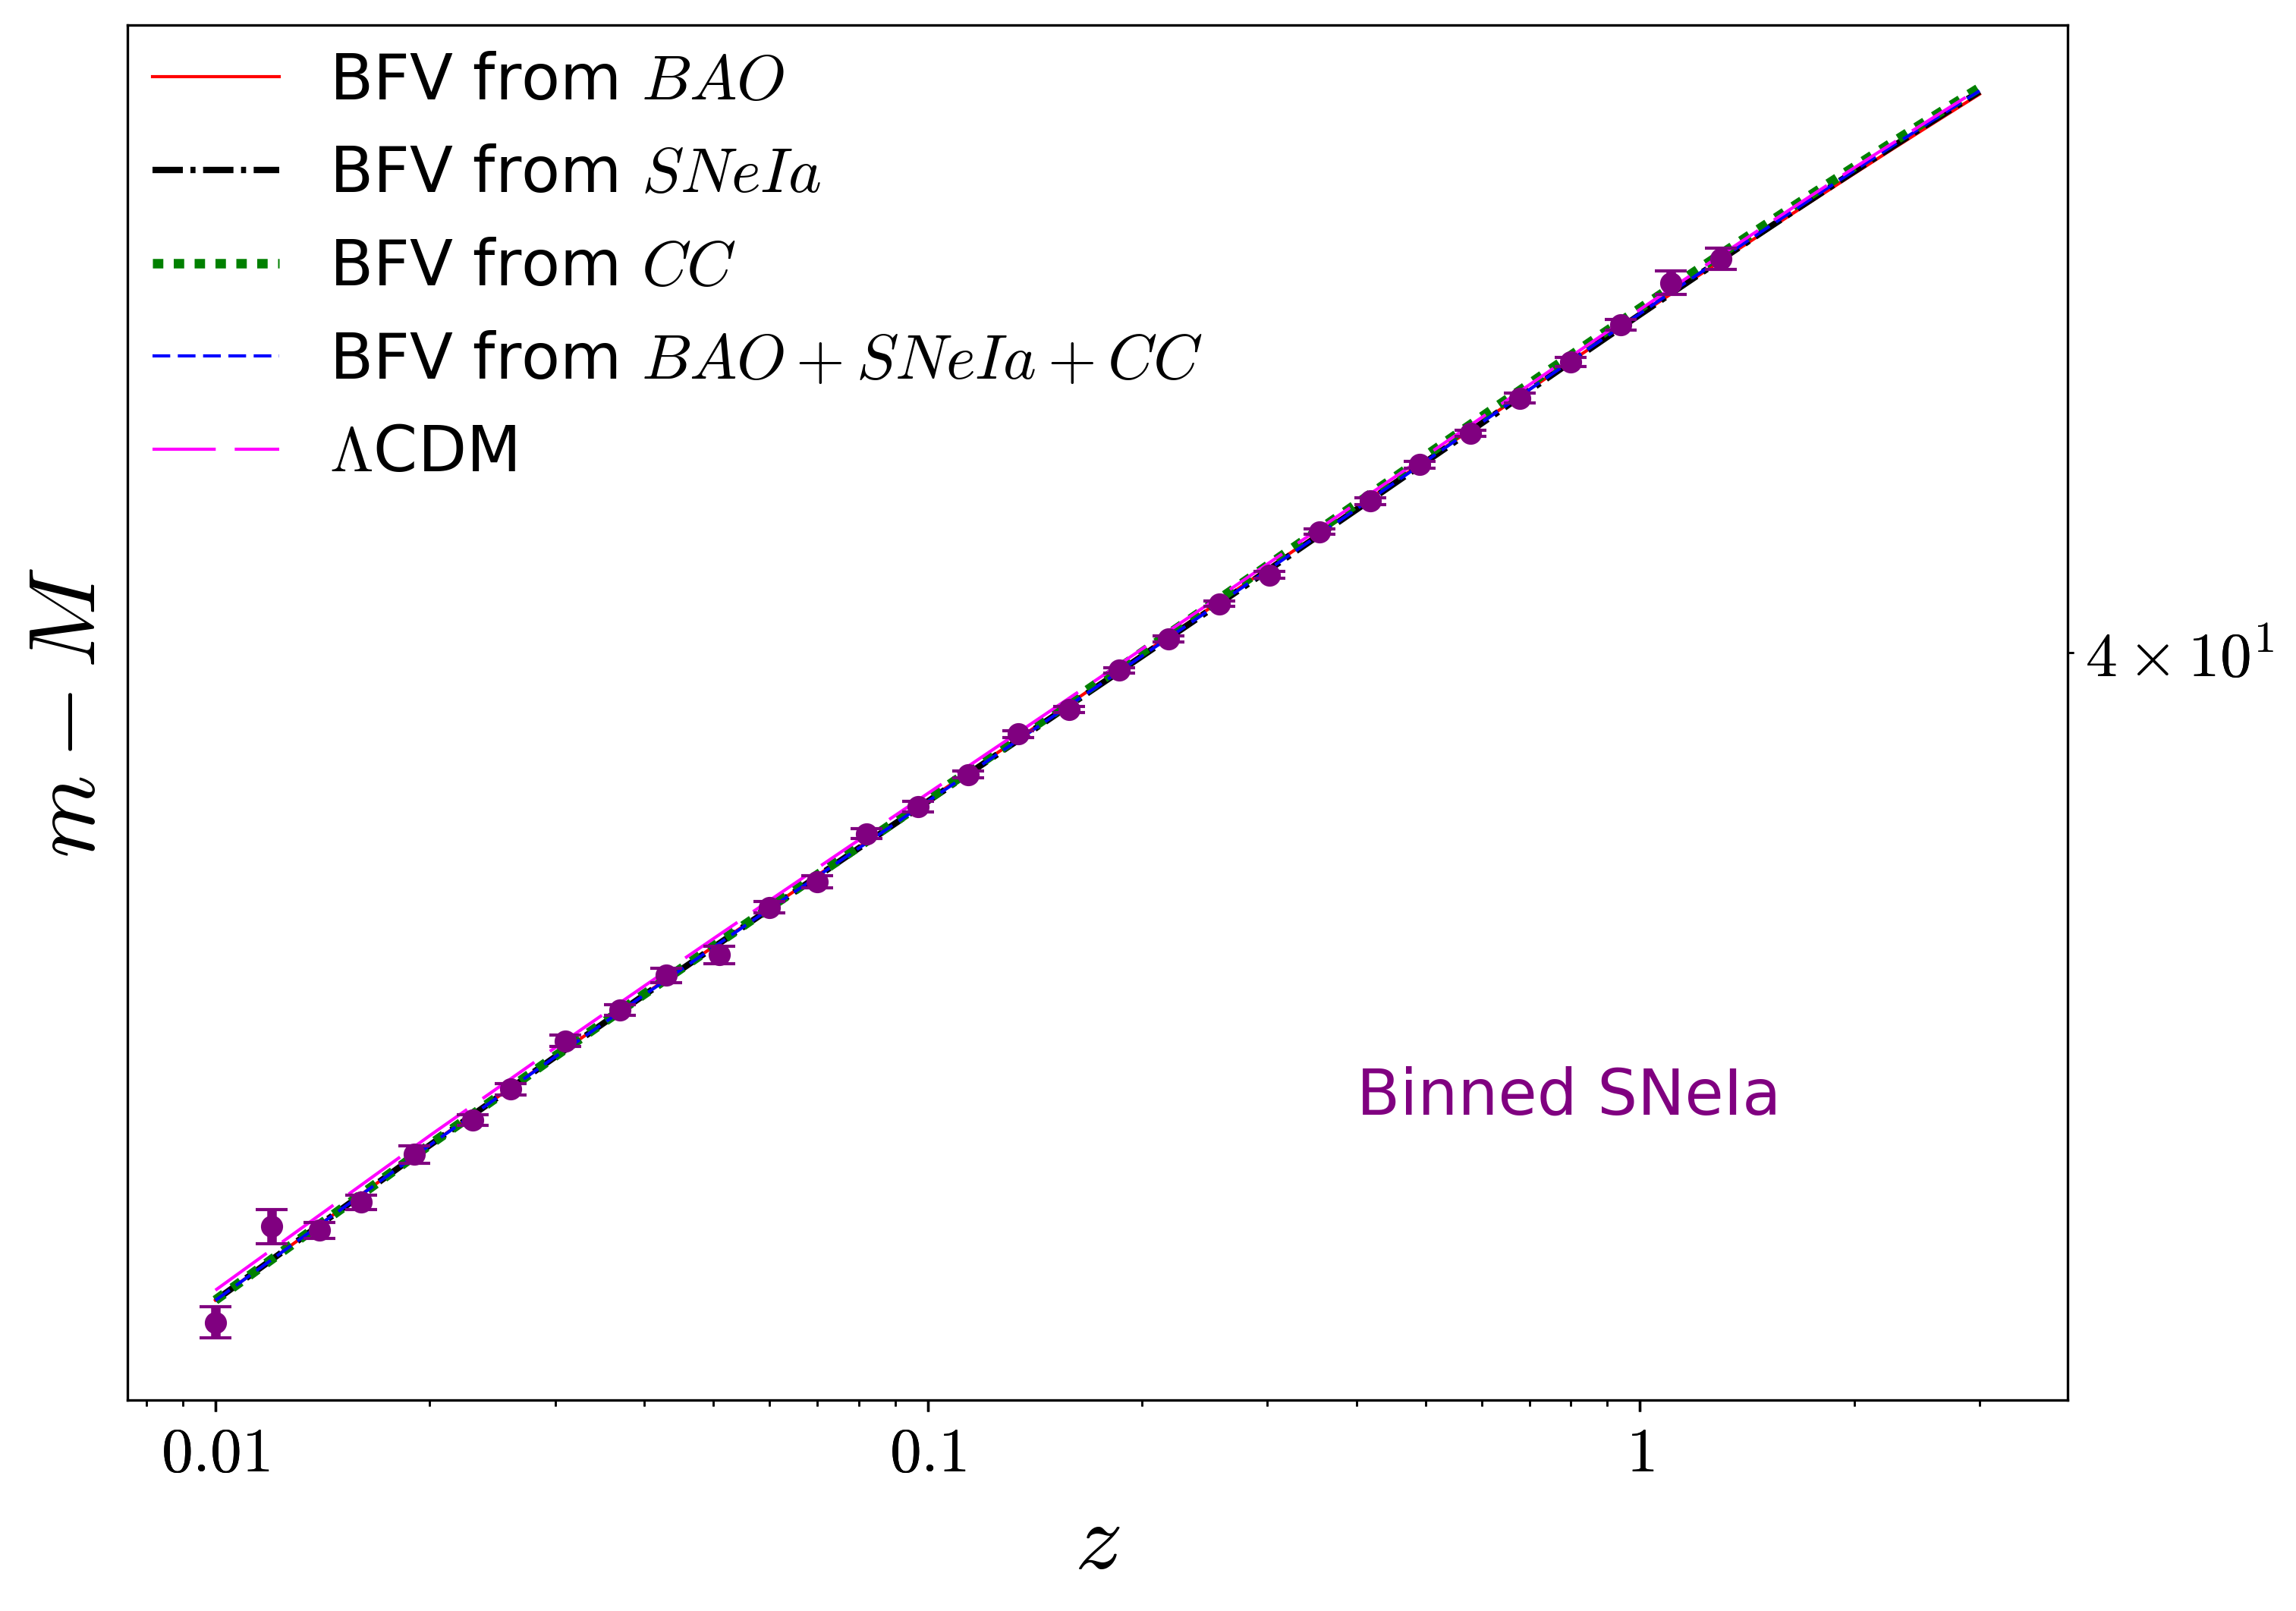

In [85]:
# Size in inches, and dots per inch
#normalize_params()
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset']='cm'

fig1 = figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(1, 1)
subplots_adjust(hspace=0.01)

subplot(grid_spec[0])
cax = gca()



plot(zarray, muB, ls = '-', color = 'red', lw = 1, label = "BFV from $BAO$")
plot(zarray, muS, ls='-.', color="black", lw=2, label="BFV from $SNeIa$")
plot(zarray, muH, ls=':', color="green", lw=3, label="BFV from $CC$")
plot(zarray, muT, ls='--', color="blue", lw=1, label="BFV from $BAO + SNeIa + CC$")
plot(zarray, muL, ls='--', color='magenta', dashes=[10,3], lw=1, label=r'$\Lambda$CDM')

plt.yscale('log')
plt.xscale('log')

errors_Sne = np.sqrt(ERROR_SNe)
plt.errorbar(REDSHIFTS_SNe, OBS_SNe, errors_Sne, color='purple',
             xerr=None,marker='o',ls='None', elinewidth =3, capsize=5, capthick = 1)
text(0.4, 3.5E1,'Binned SNeIa', fontsize=20, color='purple')
ymin, ymax = ylim()
#xlim(0,2)
xlabel(r'$z$', fontsize=30)
ylabel(r'$m - M$', fontsize=30)


cax.yaxis.set_ticks_position('right')

cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())
plt.legend(loc='best', borderaxespad=0., prop={'size':20}, frameon=False)

#################### Empty subplot  #####################

cax2 = fig1.add_subplot(grid_spec[0], sharex=cax, frameon=False)
cax2.yaxis.set_major_formatter(FancyFormatter())
cax2.xaxis.set_major_formatter(FancyFormatter())
cax2.yaxis.set_ticks_position("right")
#cax2.xaxis.set_ticks_position("top")
cax2.set_yscale('log')
cax2.set_ylim(ymin, ymax)
#cax2.set_xlim(0,2)
savefig('./../figures/muSNe_bfvs_loglog.pdf', bbox_inches='tight')



### $H(z)$ from cosmic clocks

In [62]:
HzB = (100/H0p)*hz(zarray, wparams_bao, cosmo_params)
HzS = (100/H0p)*hz(zarray, wparams_sne, cosmo_params)
HzH = (100/H0p)*hz(zarray, wparams_hz, cosmo_params)
HzT = (100/H0p)*hz(zarray, wparams_tot, cosmo_params)
HzL = (100/H0p)*hz(zarray, wparams_lcdm, cosmo_paramslcdm)


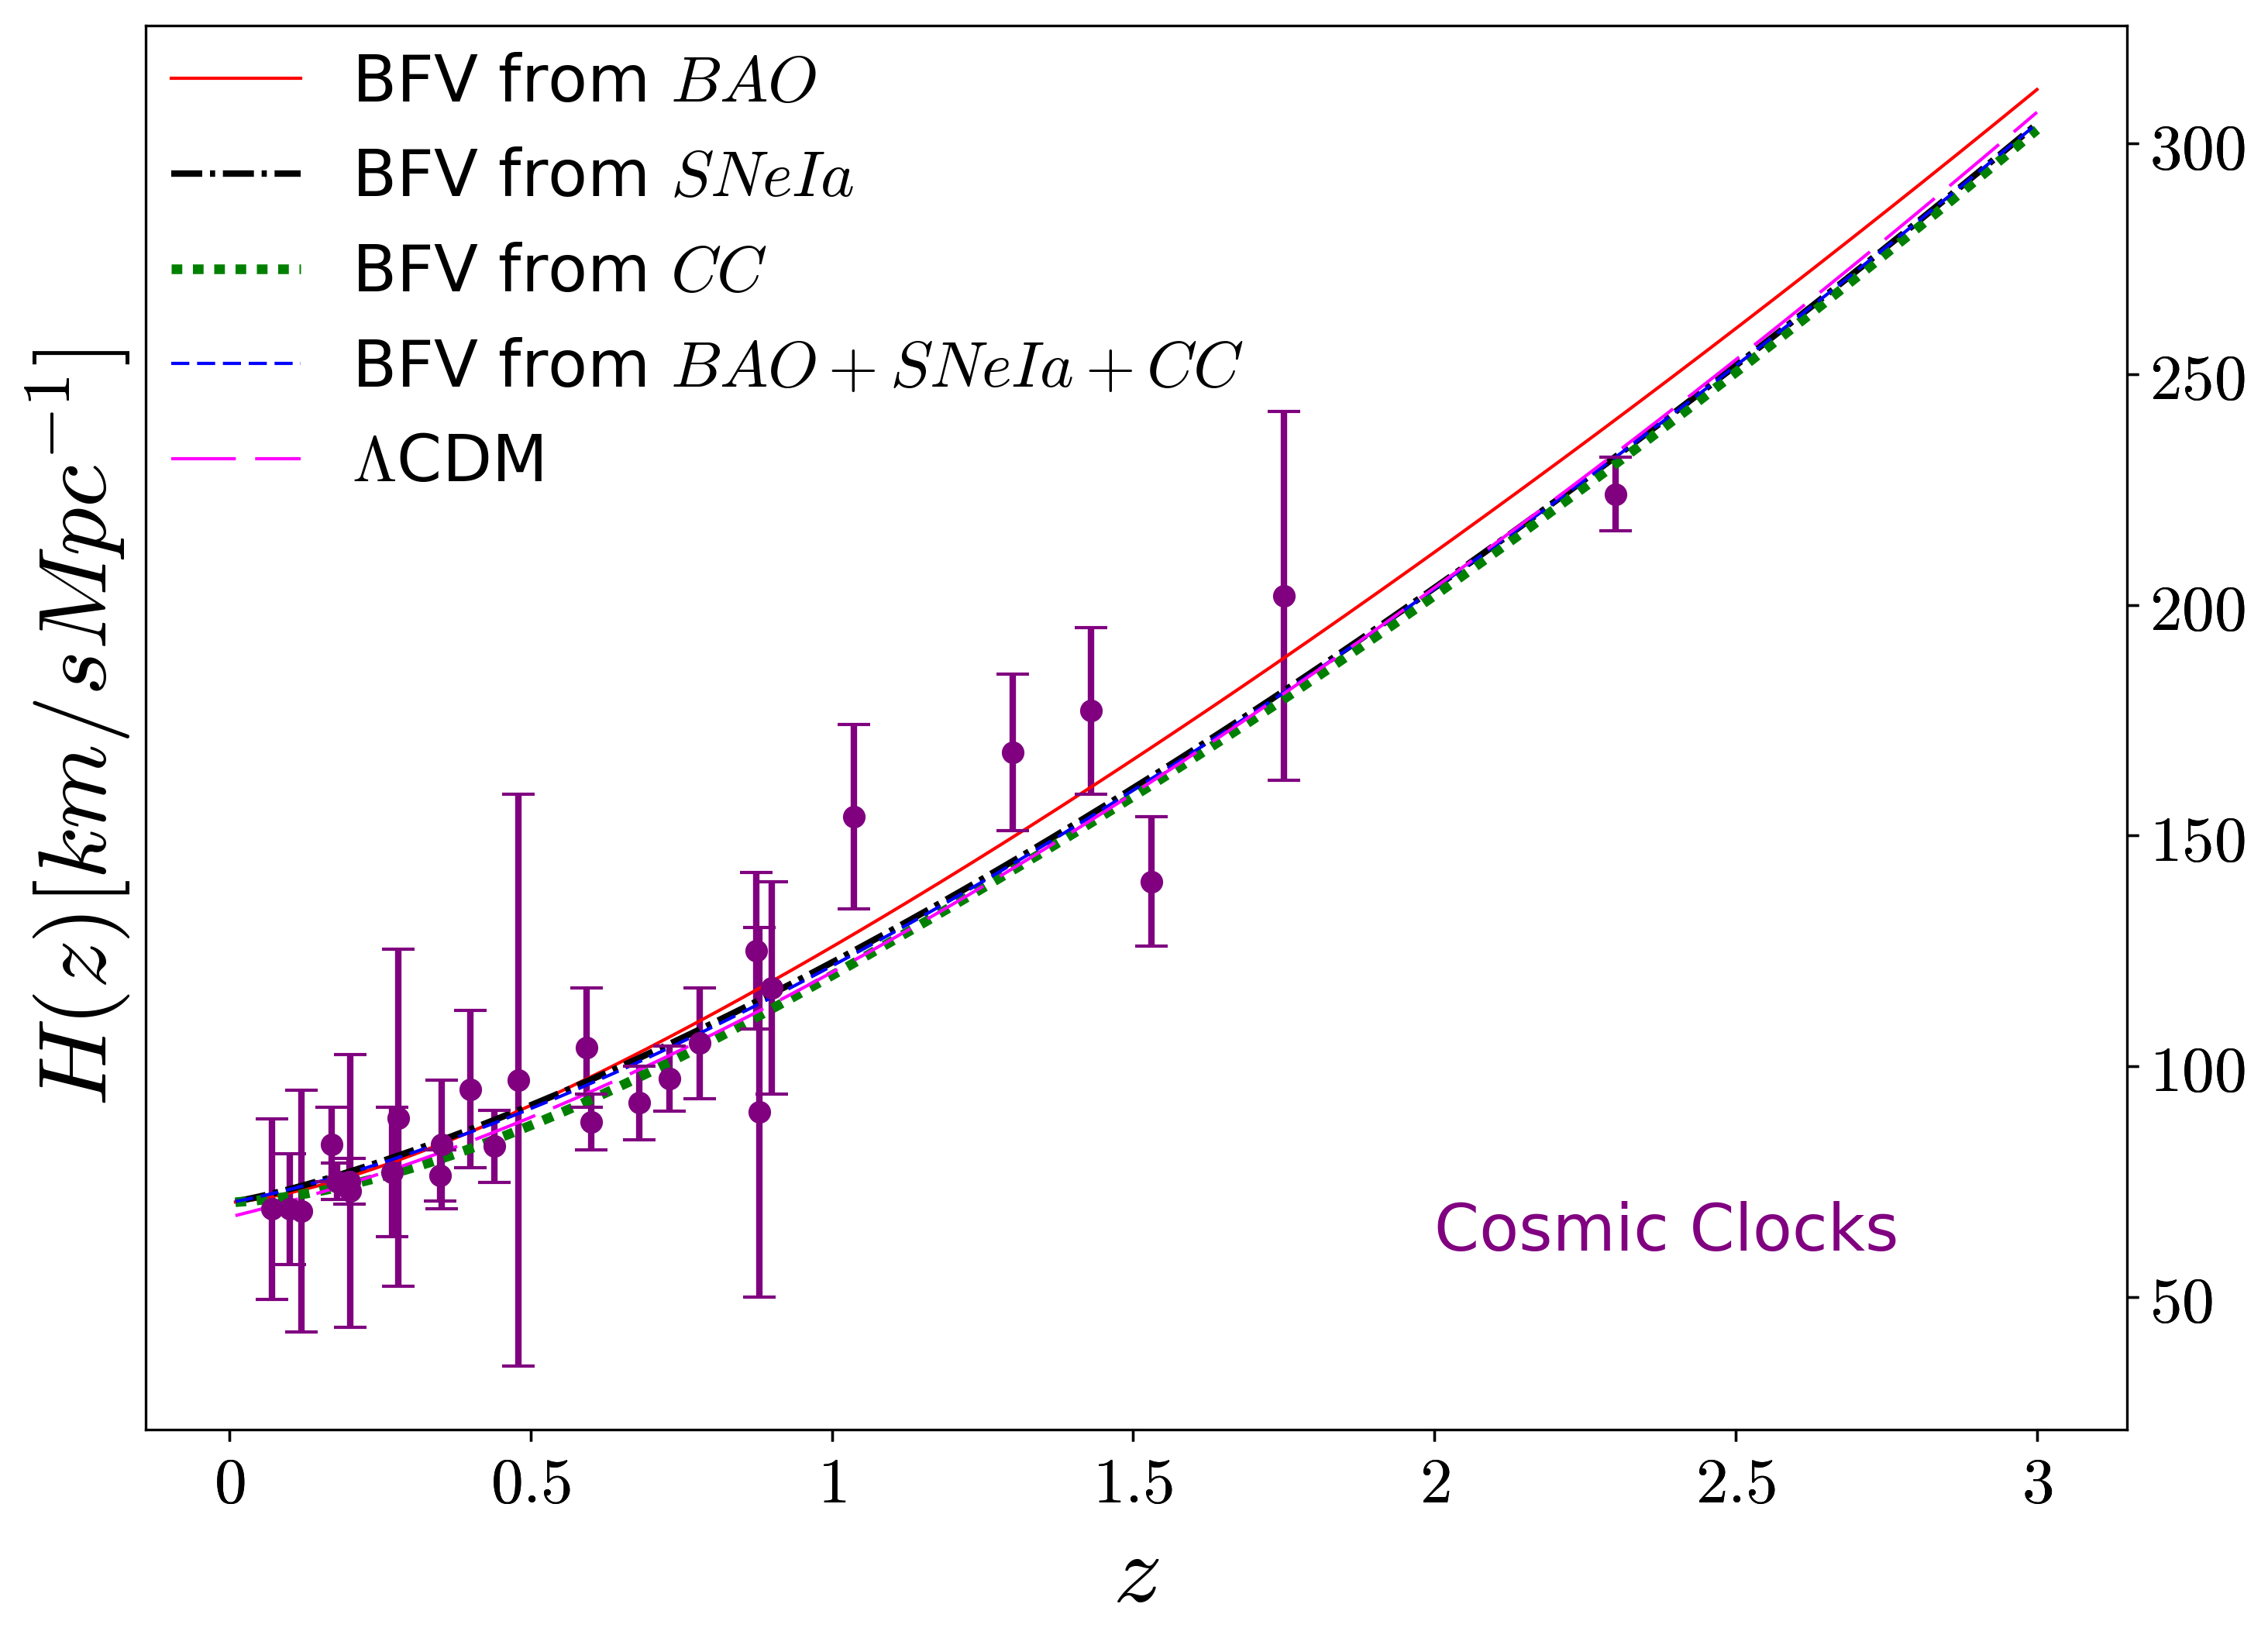

In [73]:
# Size in inches, and dots per inch
#normalize_params()
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset']='cm'

fig1 = figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(1, 1)
subplots_adjust(hspace=0.01)

subplot(grid_spec[0])
cax = gca()



plot(zarray, HzB, ls = '-', color = 'red', lw = 1, label = "BFV from $BAO$")
plot(zarray, HzS, ls='-.', color="black", lw=2, label="BFV from $SNeIa$")
plot(zarray, HzH, ls=':', color="green", lw=3, label="BFV from $CC$")
plot(zarray, HzT, ls='--', color="blue", lw=1, label="BFV from $BAO + SNeIa + CC$")
plot(zarray, HzL, ls='--', color='magenta', dashes=[10,3], lw=1, label=r'$\Lambda$CDM')

#plt.yscale('log')
#plt.xscale('log')


plt.errorbar(REDSHIFTS_Hz, OBS_Hz, ERROR_Hz , color='purple',
             xerr=None, marker='o', ls='None', elinewidth =2, capsize=5, capthick = 1)
text(2,60, 'Cosmic Clocks', fontsize=20, color='purple')
ymin, ymax = ylim()

xlabel(r'$z$', fontsize=30)
ylabel(r'$H(z) [km/s Mpc^{-1}]$', fontsize=30)


cax.yaxis.set_ticks_position('right')

cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())
plt.legend(loc='best', borderaxespad=0., prop={'size':20}, frameon=False)

#################### Empty subplot  #####################

cax2 = fig1.add_subplot(grid_spec[0], sharex=cax, frameon=False)
cax2.yaxis.set_major_formatter(FancyFormatter())
cax2.xaxis.set_major_formatter(FancyFormatter())
cax2.yaxis.set_ticks_position("right")
#cax2.xaxis.set_ticks_position("top")
#cax2.set_yscale('log')
cax2.set_ylim(ymin, ymax)

savefig('./../figures/hz_bfvs_linear.pdf', bbox_inches='tight')



# 2-Dimensional parametrization

In [98]:
fileBAOb = './../Output/BFV/BAO/Bidimensional-20171105-210945.txt'
fileTotalb= './../Output/BFV/Total/Bidimensional-20171105-205034.txt'
fileSNeb = './../Output/BFV/SNe/Bidimensional-20171105-211509.txt'
fileHzb = './../Output/BFV/Hz/Bidimensional-20171105-210511.txt'

In [99]:
bfvBb = np.loadtxt(fileBAOb)
bfvSb = np.loadtxt(fileSNeb)
bfvHb = np.loadtxt(fileHzb)
bfvTb = np.loadtxt(fileTotalb)

[wtodayb2, chi2minb2, chi2redb2, w1b2, w2b2,  h2, om2] = bfvBb
[wtodays2, chi2mins2, chi2reds2, w1s2, w2s2,  h2, om2] = bfvSb
[wtodayh2, chi2minh2, chi2redh2, w1h2, w2h2,  h2, om2] = bfvHb
[wtodayt2, chi2mint2, chi2redt2, w1t2, w2t2,  h2, om2] = bfvTb

wparams_bao2 = w1b2, w2b2
wparams_sne2 = w1s2, w2s2
wparams_hz2 =  w1h2, w2h2
wparams_tot2 = w1t2, w2t2
cosmo_params2 =  h2, om2


wparams_lcdm2 = 0, 0
cosmo_paramslcdm = REDUCED_H0, OMEGAM0

zarray = np.linspace(0.01,3,300)



In [100]:
def wzb(z, w_params, cosmo_params):
    '''bidimensional proposal'''
    w1, w2 = w_params
    h, OmM = cosmo_params
    if w1 == 0:
        return -1
    
    return -1 + w1*(1+z)/(1+z**4)*np.cos(z+w2)